In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
gdp_df = pd.read_csv("../../data/UNdata_Export_GDP.csv", skipfooter=3, engine='python')


In [3]:
print(gdp_df[:11])
print(gdp_df[-5:])

   Country or Area  Year        Value  Value Footnotes
0      Afghanistan  2019  2065.036398              NaN
1      Afghanistan  2018  2033.779002              NaN
2      Afghanistan  2017  2058.383832              NaN
3      Afghanistan  2016  2057.062164              NaN
4      Afghanistan  2015  2068.265904              NaN
5      Afghanistan  2014  2102.385234              NaN
6      Afghanistan  2013  2116.465454              NaN
7      Afghanistan  2012  2075.491747              NaN
8      Afghanistan  2011  1904.559799              NaN
9      Afghanistan  2010  1957.029338              NaN
10     Afghanistan  2009  1758.904043              NaN
     Country or Area  Year        Value  Value Footnotes
6863        Zimbabwe  1994  3263.934978              NaN
6864        Zimbabwe  1993  3033.504852              NaN
6865        Zimbabwe  1992  3054.889178              NaN
6866        Zimbabwe  1991  3426.598094              NaN
6867        Zimbabwe  1990  3324.348171              Na

In [4]:
gdp_df = gdp_df.drop(columns='Value Footnotes')
gdp_df.columns=['Country', 'Year', 'GDP_Per_Capita']



In [5]:
gdp_df.shape

(6868, 3)

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6868 entries, 0 to 6867
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6868 non-null   object 
 1   Year            6868 non-null   int64  
 2   GDP_Per_Capita  6868 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 161.1+ KB


In [7]:
gdp_df["Year"].value_counts()

2013    238
2014    238
2016    238
2015    238
2017    238
2012    237
2018    237
2011    237
2009    236
2010    236
2007    235
2008    235
2006    235
2004    234
2005    234
2002    233
2003    233
2001    232
2019    231
2000    231
1999    224
1998    223
1997    223
1996    221
1995    221
1994    214
1993    212
1992    209
1991    208
1990    207
Name: Year, dtype: int64

In [8]:
gdp_df['Country'].value_counts()

Pakistan                     30
East Asia & Pacific          30
Kenya                        30
Guyana                       30
Sudan                        30
                             ..
Nauru                        16
Cayman Islands               13
Sint Maarten (Dutch part)    10
Turks and Caicos Islands      9
Djibouti                      7
Name: Country, Length: 238, dtype: int64

In [9]:
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]
print(gdp_2014)

                  Country  Year  GDP_Per_Capita
5             Afghanistan  2014     2102.385234
23                Albania  2014    11623.866679
53                Algeria  2014    11512.705405
83                 Angola  2014     8239.828837
113   Antigua and Barbuda  2014    18104.241470
...                   ...   ...             ...
6727              Vietnam  2014     6098.489609
6757   West Bank and Gaza  2014     5967.073437
6783                World  2014    15189.648507
6813               Zambia  2014     3450.046561
6843             Zimbabwe  2014     2955.240287

[238 rows x 3 columns]


In [10]:
gdp_2014["GDP_Per_Capita"].describe()

count       238.000000
mean      19766.710348
std       20983.869623
min         822.610458
25%        4753.110934
50%       12209.385755
75%       26803.610474
max      156514.133850
Name: GDP_Per_Capita, dtype: float64

array([[<AxesSubplot:title={'center':'GDP_Per_Capita'}>]], dtype=object)

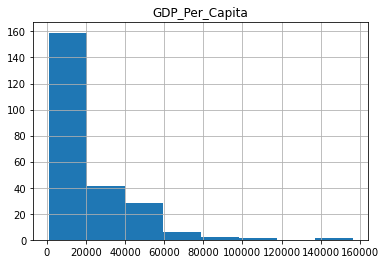

In [11]:
gdp_2014.hist(column="GDP_Per_Capita", bins=8)

In [12]:
#Top 5 countries by GDP per capita in 2014
gdp_2014[:6].sort_values("GDP_Per_Capita", ascending=False)

,Country,Year,GDP_Per_Capita
113,Antigua and Barbuda,2014,18104.241470
143,Arab World,2014,14219.562395
23,Albania,2014,11623.866679
53,Algeria,2014,11512.705405
83,Angola,2014,8239.828837
5,Afghanistan,2014,2102.385234


In [13]:
#Bottom 5 countries by GDP per capita in 2014
gdp_2014[:6].sort_values("GDP_Per_Capita", ascending=True)

,Country,Year,GDP_Per_Capita
5,Afghanistan,2014,2102.385234
83,Angola,2014,8239.828837
53,Algeria,2014,11512.705405
23,Albania,2014,11623.866679
143,Arab World,2014,14219.562395
113,Antigua and Barbuda,2014,18104.241470


In [14]:
#Pivot table containing GDP_Per_Capita from 1990 - 2017
gdp_pivoted = gdp_df[gdp_df["Year"].isin([1990, 2017])].pivot_table(values="GDP_Per_Capita", 
                                                                index="Country", 
                                                                columns="Year")
#drops any row where there are missing values
gdp_pivoted = gdp_pivoted.dropna()                                                   
gdp_pivoted

Year,1990,2017
Country,,
Albania,4842.734635,12811.759436
Algeria,8746.352901,11737.409353
Angola,5783.429064,7310.901738
Antigua and Barbuda,15459.551675,19840.076123
Arab World,9694.667544,14555.474921
...,...,...
Vanuatu,2888.309393,3116.645194
Vietnam,1673.249634,7155.745829
World,9680.269697,16253.385518


In [15]:
#Adds a column to gdp_pivoted to include the percent change from 1990 2017
gdp_pivoted["Percent_Change"] = (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990] * 100


In [16]:
#Number of countries with negative percent change
sum(gdp_pivoted["Percent_Change"]<0)


17

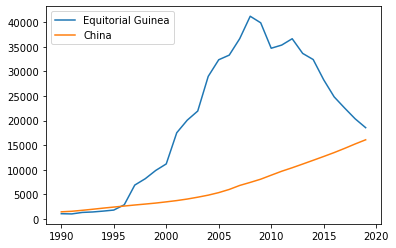

In [17]:
#Plot of the countries with the top two greatest change in GDP_per_capita
gdp_eguinea = gdp_df[gdp_df["Country"].
                     isin(["Equatorial Guinea"])].pivot_table(values="GDP_Per_Capita", 
                                                                index="Year", 
                                                                columns="Country")
gdp_china = gdp_df[gdp_df["Country"].
                   isin(["China"])].pivot_table(values="GDP_Per_Capita", 
                                                                index="Year", 
                                                                columns="Country")

plt.plot(gdp_eguinea)
plt.plot(gdp_china)
plt.legend(["Equitorial Guinea", "China"])
plt.show()

In [18]:
continents = pd.read_csv("../../data/continents.csv", engine='python')

In [19]:
gdp_df = pd.merge(gdp_df, continents, on="Country")


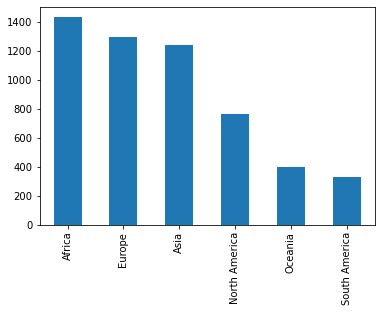

In [20]:
gdp_df['Continent'].value_counts().plot(kind='bar')
plt.show()


<AxesSubplot:xlabel='Continent', ylabel='GDP_Per_Capita'>

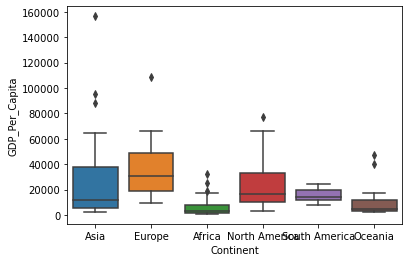

In [25]:
gdp_2014 = gdp_df.loc[gdp_df['Year'] == 2014]
sns.boxplot(x=gdp_2014["Continent"], y=gdp_2014["GDP_Per_Capita"])

In [41]:
internet_df = pd.read_csv("../../data/UNdata_Export_Internet.csv", nrows=4496, engine='python')
internet_df = internet_df.drop(columns='Value Footnotes')
internet_df.columns=['Country', 'Year', 'Internet_Usres_Pct']

internet_df.shape
internet_df.info()
internet_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Usres_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


,Country,Year,Internet_Usres_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [61]:
internet_df.loc[internet_df['Internet_Usres_Pct'] > 0].sort_values("Year", ascending=True)

,Country,Year,Internet_Usres_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


<AxesSubplot:xlabel='Year'>

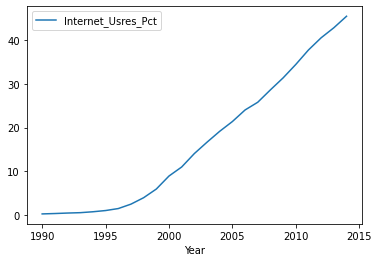

In [64]:
internet_df[internet_df['Internet_Usres_Pct'] > 0].pivot_table(values="Internet_Usres_Pct", index=["Year"], aggfunc=np.mean).plot()

In [66]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=["Country", "Year"])
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Continent,Internet_Usres_Pct
0,Afghanistan,2014,2102.385234,Asia,6.390000
1,Afghanistan,2013,2116.465454,Asia,5.900000
2,Afghanistan,2012,2075.491747,Asia,5.454545
3,Afghanistan,2011,1904.559799,Asia,5.000000
4,Afghanistan,2010,1957.029338,Asia,4.000000
...,...,...,...,...,...
3453,Zimbabwe,1997,3580.048793,Africa,0.033080
3454,Zimbabwe,1996,3520.430146,Africa,0.016790
3455,Zimbabwe,1995,3226.413930,Africa,0.007684
3456,Zimbabwe,1994,3263.934978,Africa,0.001739
